In [1]:
from functions import *
from random import sample
from htmldate import find_date
from concurrent.futures import ThreadPoolExecutor
from bs4 import BeautifulSoup
import json
from langid.langid import LanguageIdentifier, model
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib


import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from six.moves import zip

In [8]:
base_path = "/media/ruben/Data Drive/react-data/protest/selection2"

d_ = dict()

for photo in [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]:
    photo_folder = os.path.join(base_path, photo)
    
    with open(os.path.join(photo_folder,'dates.txt'),'r') as f:
        dates = f.readlines()
    dates = [d.split('|')[1].replace("\n","") for d in dates]
    perc_na = len([d for d in dates if d == "na"]) / len(dates) * 100
    d_.update({photo:{"len_dates":len(dates), "perc_na":perc_na, "years":dict()}})
    
    dates = [d.split("-") for d in dates if '-' in d]
    dates = dict(Counter([year for date in dates for year in date if len(year) == 4]))
    d_[photo]["years"] = dates

In [9]:
# Open translation file
refdf = pd.read_csv("/media/ruben/FEF44259F44213F5/Users/Ruben/Documents/GitHub/ReACT_GCV/data/images_tables_article_2/descriptive-full.csv")
refdf = dict(zip(refdf['image'],refdf['pretty_title']))

In [10]:
df = pd.DataFrame()

for key,value in d_.items():
    tmp = pd.DataFrame(list(value["years"].items()))
    tmp['id'] = refdf[key]
    df = df.append(tmp)
df.columns = ['year','count',"city"]

In [11]:
df = df.groupby(['year','city']).sum().reset_index()
df['year'] = df['year'].astype(int)
df = df[(df['year'] > 2002) & (df['year'] < 2020)]
df['year'] = df['year'].astype(str)

In [12]:
dfp = df.pivot(index="year",columns="city",values="count").reset_index().fillna(0)
freq_dict = {c:str(int(dfp[c].sum())) for c in list(dfp.columns)[1:]}

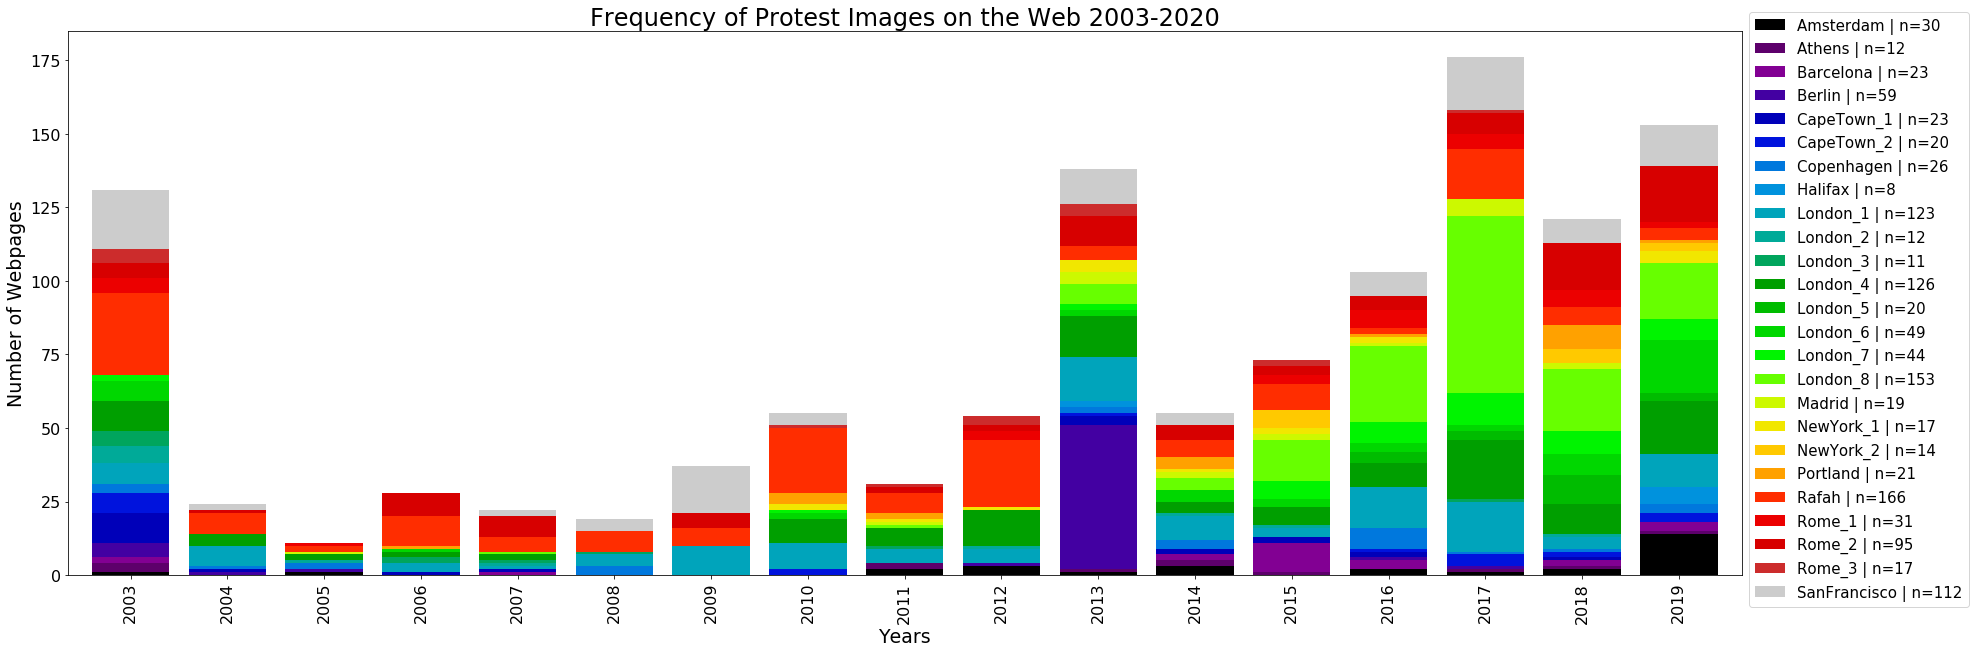

In [13]:
dfp.plot.bar(x='year',stacked=True,figsize = (30,10),colormap='nipy_spectral',width=0.8)
plt.legend([c + " | n=" + freq_dict[c] for c in list(dfp.columns)[1:]], loc='upper left', bbox_to_anchor=(1.0, 1.05), fontsize=15)
plt.title('Frequency of Protest Images on the Web 2003-2020',size=24)
plt.xlabel('Years',fontsize=19)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Number of Webpages',fontsize=19)
#plt.savefig("/media/ruben/FEF44259F44213F5/Users/Ruben/Documents/GitHub/ReACT_GCV/data/images_tables_article/frequency-photo-diachronic.png",dpi=300, bbox_inches='tight')
plt.show()